**1. Instalasi Library**

In [8]:
!pip install networkx matplotlib

**2. Struktur Data Graf dan Algoritma**

In [9]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

**3. Fungsi untuk Merekonstruksi Jalur**

In [10]:
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

**4. Visualisasi dengan Netwrokx dan Matplotlib**

In [16]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Ganti tata letak di sini:
    pos = nx.circular_layout(G)  # Atau gunakan: nx.kamada_kawai_layout(G)

    edge_colors = ['red' if path and (u, v) in zip(path, path[1:]) else 'black' for u, v in G.edges()]
    weights = nx.get_edge_attributes(G, 'weight').values()

    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_size=700, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    plt.show()

**5. Penggunaan Lengkap**

Jarak dari A ke Z: 8
Jalur: A → C → F → Z


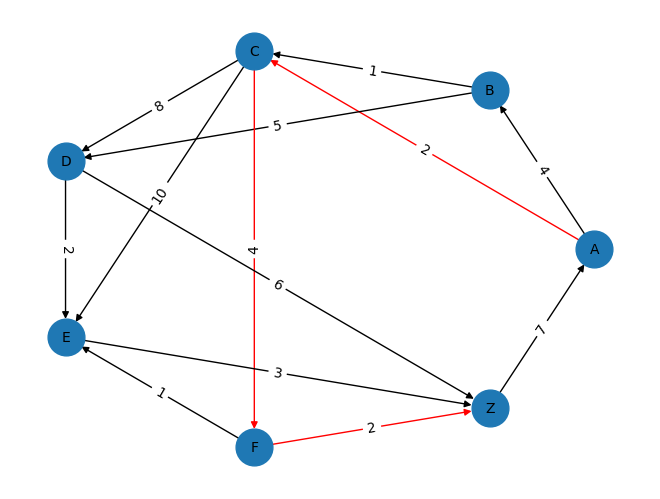

In [17]:
# Definisi graf
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'A': 7}  # Membuat siklus kembali ke A
}

# Tambahkan simpul F dan koneksinya
graph['F'] = {'E': 1, 'Z': 2}

# Hubungkan simpul C ke simpul F
graph['C']['F'] = 4

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

**Modifikasi graf agar memiliki siklus dan ulangi visualisasinya**

In [1]:
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'A': 7}  # Membuat siklus kembali ke A
}

**Tambahkan simpul baru dan lihat bagaimana jalur terpendek berubah**

In [2]:
graph['F'] = {'E': 1, 'Z': 2}
graph['C']['F'] = 4  # Hubungkan simpul C ke simpul F

**Ganti tata letak graf dengan pos = nx.circular_layout(G) atau kamada_kawai_layout**

In [3]:
def visualize_graph(graph, path=None):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    # Ganti tata letak di sini:
    pos = nx.circular_layout(G)  # Atau gunakan: nx.kamada_kawai_layout(G)

    edge_colors = ['red' if path and (u, v) in zip(path, path[1:]) else 'black' for u, v in G.edges()]
    weights = nx.get_edge_attributes(G, 'weight').values()

    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_size=700, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    plt.show()